## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
rows_number = df.shape[0]
rows_number

294478

c. The number of unique users in the dataset.

In [4]:
number_unique_user = df['user_id'].nunique()
number_unique_user

290584

d. The proportion of users converted.

In [5]:
proportion_converted_user = df['converted'].mean()
proportion_converted_user

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# df.query("landing_page=='old_page'& group=='treatment' or landing_page=='new_page'& group=='control'").shape[0]
oldpage_treatment = df.query("landing_page=='old_page'& group=='treatment'").shape[0]
newpage_control = df.query("landing_page=='new_page'& group=='control'").shape[0]
times_new_page_treatment_not_line_up = oldpage_treatment + newpage_control
times_new_page_treatment_not_line_up

3893

f. Do any of the rows have missing values?

In [7]:
number_missing_values = sum(df.isnull().sum())
number_missing_values

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#https://github.com/thomastt2020/Udacity-A-B-Test/blob/master/Analyze_ab_test_results_notebook.ipynb
df_control = df.query("group=='control' and landing_page=='old_page'")
df_treatment = df.query("group=='treatment' and landing_page=='new_page'")
df2 = df_control.merge(df_treatment ,how = 'outer')
df2.head(5)
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
number_unique_user = df2['user_id'].nunique()
number_unique_user

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#https://github.com/thomastt2020/Udacity-A-B-Test/blob/master/Analyze_ab_test_results_notebook.ipynb
df2[df2.duplicated(['user_id'],keep = False)]

,user_id,timestamp,group,landing_page,converted
146212,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
user_id_repeated = df2.iloc[146212,0]
user_id_repeated

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
146212,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(['user_id'],keep = 'first',inplace = True)
df2.query("user_id==773192")

,user_id,timestamp,group,landing_page,converted
146212,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query("group=='control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query("group=='treatment'")['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query("landing_page=='new_page'").shape[0]/df2['landing_page'].shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [19]:
# To answer that question, I conduct two proportion z test (two-sided)
# http://ethen8181.github.io/machine-learning/ab_tests/frequentist_ab_test.html
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [20]:
contol_converted_size = df2.query("group=='control' & landing_page =='old_page'").shape[0]
contol_converted_size

145274

In [21]:
treatment_converted_size = df2.query("group=='treatment' & landing_page =='new_page'").shape[0]
treatment_converted_size

145310

In [22]:
sucess_control_converted = df2.query("group=='control' & landing_page =='old_page'& converted == 1").shape[0]
sucess_control_converted

17489

In [23]:
sucess_treatment_converted = df2.query("group=='treatment' & landing_page =='new_page'& converted == 1").shape[0]
sucess_treatment_converted

17264

In [24]:
success_n = np.array([17489, 17264])
total_size = np.array([145274, 145311])
zscore, pvalue = proportions_ztest(success_n, total_size, alternative = 'two-sided')
zscore, pvalue

(1.3116075339133115, 0.18965258971881804)

**From above, we find that probabilty of control groug to be converted is 12.03%, propabilty of treatment group to be converted is 11.88% and propability of conversion is 11.95%. The probability that an individual received the new page is 50% which indicate there is aproximatly 2 equal sample,one receiving old_page and the other receiving new_page. <br>
I have conduct two proportion Z testwith the following hypothesis:<br>
------------------------------H0:p(old_page and converted) = pB((new_page and converted)---------------------------<br>
------------------------------HA:p(old_page and converted) ≠ pB((new_page and converted)---------------------------<br>
With Alpha = 0.05, I have found that P_value = 0.189 > 0.05. thus, there is no sufficient evidence to reject null hypothese and conclud there is no difference in conversion rate between control and treatment group.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**<br>
  H Null:             $p_{old}$ >= $p_{new}$<br>
  H Alternative:      $p_{old}$ <  $p_{new}$** 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2['converted'].mean()

In [26]:
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = df2['converted'].mean()

In [28]:
p_old

0.11959708724499628

c. What is $n_{new}$?

In [29]:
n_new = df2.query("group=='treatment' & landing_page =='new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [30]:
n_old = df2.query("group=='control' & landing_page =='old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])
new_page_converted.mean()

0.11912463010116303

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_old])
old_page_converted.mean()

0.12002147665790162

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
obs_diff = df2.query("group=='treatment'")['converted'].mean() - df2.query("group=='control'")['converted'].mean()
obs_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
#p_diffs = []
#for _ in range(10000):
    #p_new = np.random.choice([1, 0], size=n_new, p=[convert_rate_p_new_under_the_null, 1-convert_rate_p_new_under_the_null]).mean()
    #p_old = np.random.choice([1, 0], size=n_old, p=[convert_rate_p_old_under_the_null, 1-convert_rate_p_old_under_the_null]).mean()
    #p_diffs.append(p_new - p_old)

In [35]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new 
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

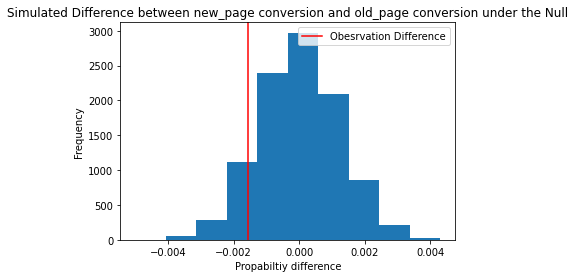

In [36]:
# convert to numpy array
p_diffs = np.array(p_diffs)
#from class room
p_diffs = np.random.normal(0,p_diffs.std(),p_diffs.size)

# plot sampling distribution under null
plt.hist(p_diffs)
plt.xlabel('Propabiltiy difference')
plt.ylabel('Frequency')
plt.axvline(x=obs_diff, color='red' , label ='Obesrvation Difference')
plt.legend()
plt.title('Simulated Difference between new_page conversion and old_page conversion under the Null');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
(p_diffs > obs_diff).mean()

0.9044

**Another way to perfrom above test in much simple steps**

In [38]:
# http://ethen8181.github.io/machine-learning/ab_tests/frequentist_ab_test.html
contol_converted_size = df2.query("group=='control' & landing_page =='old_page'").shape[0]
contol_converted_size

145274

In [39]:
treatment_converted_size = df2.query("group=='treatment' & landing_page =='new_page'").shape[0]
treatment_converted_size

145310

In [40]:
sucess_control_converted = df2.query("group=='control' & landing_page =='old_page'& converted == 1").shape[0]
sucess_control_converted

17489

In [41]:
sucess_treatment_converted = df2.query("group=='treatment' & landing_page =='new_page'& converted == 1").shape[0]
sucess_treatment_converted

17264

In [42]:
# choose smaller as alternative hypothesis(one side test)
success_n = np.array([17489, 17264])
total_size = np.array([145274, 145311])

zscore, pvalue = proportions_ztest(success_n, total_size, alternative = 'smaller')
zscore, pvalue

(1.3116075339133115, 0.905173705140591)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Value computed in part j is called P_value. P value is probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct (from investopedia.com). In simple words, if P_value > alpha, it mean that there is no sufficent evidence to reject Null hypothesis. As p_value here is >0.05, there is no sufficient evidence to conclude that new conversion rate is better than old conversion rate**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
# I have done it before(one with 2 sided, one with one side using scipy lib.)
import statsmodels.api as sm

convert_old = df2.query("group=='control' & landing_page =='old_page'& converted == 1").shape[0]
convert_new = df2.query("group=='treatment' & landing_page =='new_page'& converted == 1").shape[0]
n_old = df2.query("group=='control' & landing_page =='old_page'").shape[0]
n_new = df2.query("group=='treatment' & landing_page =='new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [44]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z score is the number of standard deviation from the mean. As above, same result, there is no suffiecient evidence to reject null hypothesis and conclude there is no differenece between old conversion rate and new conversion rate**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression , as we want to perdict conversion (category) which have two only outcome conversion and no conversion. Also, we can use linear regression model. Here, I will use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
# ab_page is treatment dummy
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.head(3)

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [46]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        14:01:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [48]:
# interpret exp. coff. of the result
1/np.exp(-0.0150)

1.015113064615719

**For each unit decrease in new_page , conversion will be 1.015 times more likely to happen, holding all other varible constant.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**From above, we find that p value = 0.19 . the same p value I found when I run two proportion Z test(two tail) in above. here the hypothesis is: H Null there is no difference between old conversion and new conversion, H Alternative is there is a difference between old conversion and new conversion. from p value, we can conclud there is no sufficient evidence to reject null hypothesis. In Part II, it is one tail test and here it is two tail test**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to consider other factor like age, country, loyality, gender, weekday, weekend, duration. but we must take care of multicollonearity  that will arise between variable. we shall also consider using high order term.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [50]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [51]:
### Create the necessary dummy variables
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])
log_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        14:01:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [52]:
# interpret exp. coff. of the result
1/np.exp(-0.0149),1/np.exp(-0.0408),np.exp(0.0099)

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)

**For each unit decrease in new_page , conversion will be 1.015 times more likely to happen, holding all other varible constant.<br>
For each unit decrease in US , conversion will be 1.014 times more likely to happen, holding all other varible constant.<br>
For each unit increase in US , conversion will be 1.01 times more likely to happen, holding all other varible constant.**


**From above, p value of US , UK = 0.13, 0.457 which is > 0.05. there is no sigficance. Coefficient of US, UK are very small which indicate there is no relation between countries that effect conversion. As from all above, as  a result there is no difference between old conversion rate and new conversion rate. conclusion: stay with old page.**<br><br>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
### Fit Your Linear Model And Obtain the Results, 
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','ab_UK', 'ab_CA']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Jun 2021   Pseudo R-squ.:               3.351e-05
Time:                        14:01:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0827      0.038     -2.176      0.030      -0.157      -0.008
ab_UK          0.0901      0.040      2.225      0.026       0.011       0.169
ab_CA          0.0644      0.038      1.679      0.093      -0.011       0.140
==============================================================================
"""

In [54]:
# interpret exp. coff. of the result
1/np.exp(-0.0827),np.exp(-0.0901),np.exp(0.0644)

(1.086215894895166, 0.9138397967222047, 1.0665189210197745)

**For each unit decrease in new_page , conversion will be 1.08 times more likely to happen, holding all other varible constant.<br>
For each unit incresase in ab_uk , conversion will be 0.913 times more likely to happen, holding all other varible constant.<br>
For each unit increase in ab_CA , conversion will be 1.06 times more likely to happen, holding all other varible constant.<br><br>
From above p value of ab_page, ab_Uk , ab_CA = 0.03, 0.026, 0.093, it a result from interaction between country and ab_page(As every one is insignificant by itself). It's unlikely to relay on regression model based on the interaction between country and ab page. Finally, we do not have enough evidence to reject the null hypothesis.<br>
Conclusion: there is no need to swith to the new page as the old page is performing well.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

